In [10]:
from sklearn.naive_bayes import GaussianNB
from datetime import datetime, timedelta
import sklearn.metrics as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
input_path = "../data/features_encoded.csv"
raw_data = pd.read_csv(input_path, header=0, skiprows=None, index_col=None, delimiter=",")

labels = raw_data['malicious'].apply(lambda x: 1 if x else 0)
features = raw_data.drop('malicious', axis=1)

train_features = features.iloc[:80000, :]
test_features = features.iloc[80000:, :]
train_labels = labels[:80000]
test_labels = labels[80000:]

In [12]:
def calculateNormalizationParams(data):
    means = data.mean()
    stdevs = data.std()
    stdevs[stdevs == 0] = 1  # Replace 0 std to avoid division by zero
    return means, stdevs

def applyNormalization(data, means, stdevs):
    return (data - means) / stdevs

In [13]:
means, stdevs = calculateNormalizationParams(train_features)
normalizedTrainFeatures = applyNormalization(train_features, means, stdevs)
normalizedTestFeatures = applyNormalization(test_features, means, stdevs)

In [18]:
gnb = GaussianNB()
gnb.fit(normalizedTrainFeatures, train_labels)
predictions = gnb.predict(normalizedTestFeatures)
probs = gnb.predict_proba(normalizedTestFeatures)
probs = pd.DataFrame(probs)
probs = probs.apply(lambda x: max(x[0],x[1]), axis=1)

In [19]:
acc = m.accuracy_score(test_labels, predictions)
prec = m.precision_score(test_labels, predictions)
recall = m.recall_score(test_labels, predictions)
f1 = m.f1_score(test_labels,predictions)
auc = m.roc_auc_score(test_labels,probs)
print("Accuracy score: " + str(acc))
print("Precision score: " + str(prec))
print("Recall score: " + str(recall))
print("F1 score: ", f1)
print("AUC-ROC: ", auc)

Accuracy score: 0.6312184390780461
Precision score: 0.6626315789473685
Recall score: 0.1574931198398799
F1 score:  0.2544976753588033
AUC-ROC:  0.4264236842577382


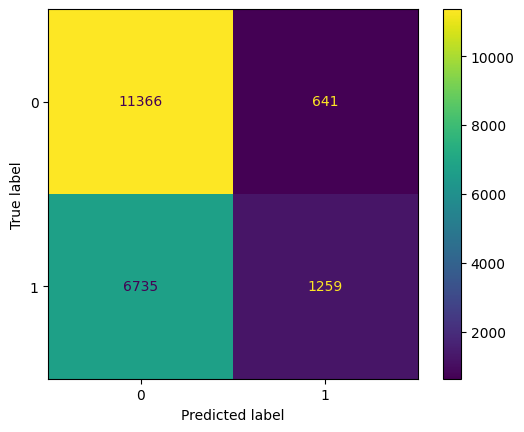

In [20]:
m.ConfusionMatrixDisplay(m.confusion_matrix(test_labels, predictions)).plot()

In [21]:
import pickle
with open('trained_models/gnb.pkl','wb') as f:
    pickle.dump(gnb,f)
print("Model dump complete!")

Model dump complete!
